<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Engenharia de Software

## Checkpoint 1 - Análise de dados de filmes (MOVIES) ou séries

Fonte de dados:

1. Netflix - Kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows
2. IMBD: https://www.imdb.com/
3. Rottentomatoes: https://www.rottentomatoes.com - https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/data

Podem incorporar fonte de dados adicional.<br>
Com o mesmo conjunto de dados é possível obter análise de dados diferentes.

- Equipes de 3 anos (ou 2 alunos, não pode ser indivual e nem > 3 alunos)
- Publicar o notebook do projeto no GitHub e enviar o link no MS Teams (Lembre-se que recrutadores pedem o link do seu GitHub, este projeto é parte do seu portfolio)
- Apenas um aluno deve postar o link para o projeto no MS Teams
- Lembrem-se de por título no projeto e o nome dos membros da equipe
- Encontrar uma chave para combinar os dados do Netflix, iMDB e Rottentomatoes
  - Note o código na URL:
     - https://www.rottentomatoes.com/m/0814255
     - https://www.imdb.com/title/tt0814255/ 

- O escopo principal de pesquisa de cada equipe deve ser diferente, exemplo:
   - Filmes de terror, drama ou comédia
   - Filmes vencedores do Oscar
   - Filmes da Marvel ou DC
   - Filmes de maior bilheteria de todos os tempos
   - Séries da Disney
   - Star Wars
   - Filmes de 2023
   - Atores em comum
   - Filmes do Nicolas Cage, Alfred Hitchcock, Meryl Streep, Steven Spielberg, Stephen King etc...
   - Filmes que superaram o investimento quanto a faturamento (boxoffice)
- Estabelecer e responder 10 questões de pesquisa avançadas (interessante e complexa)
- As respostas devem ter explicação (análise) em texto MARKDOWN, código e gráficos
- Usar Matplotlib e/ou Seaborn para gráficos
- Utilizar regressão linear
- Utilizar teste de hipótese
- Elaborar conclusão final
- Publicar o notebook do projeto .ipynb no GitHub

Lembrem-se do processo de ciências dos dados:

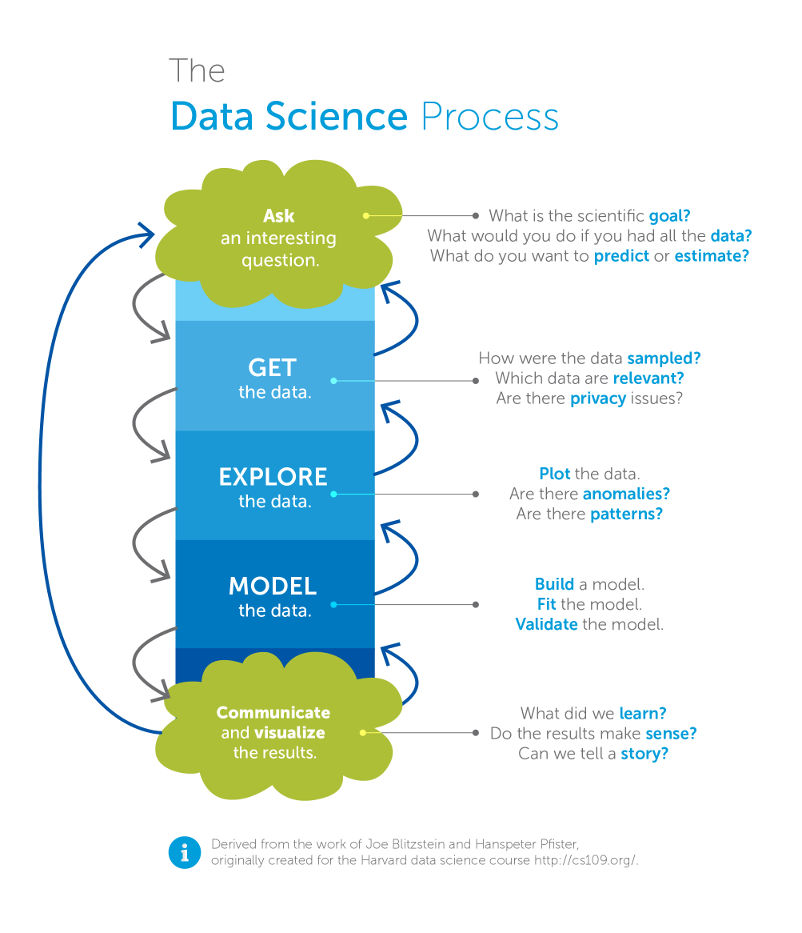

# Integrantes 
- Guilherme Rocha - RM97974
- Thiago Jardim de Oliveira - RM551624
- Vinicius do Carmo - RM


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu
from textblob import TextBlob
from wordcloud import WordCloud


In [5]:
netflix = pd.read_csv('netflix_titles.csv')
rt_reviews = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
rt_movies = pd.read_csv('rotten_tomatoes_movies.csv')

# Filtrar filmes com Adam Sandler no dataset do Netflix
tom_hanks_movies_netflix = netflix[netflix['cast'].str.contains("Tom Hanks", na=False)]

# Exibir as primeiras linhas dos filmes filtrados
tom_hanks_movies_netflix.head()

# Combinar com dados do Rotten Tomatoes usando o título como chave
# Note que pode ser necessário limpar e padronizar os títulos para combinar corretamente
combined_data = tom_hanks_movies_netflix.merge(rt_movies, left_on='title', right_on='movie_title', how='inner')

combined_data.T



,0,1,2,3,4,5,6
show_id,s330,s1611,s1625,s6502,s7736,s7950,s8462
type,Movie,Movie,Movie,Movie,Movie,Movie,Movie
title,Catch Me If You Can,Angels & Demons,The Da Vinci Code,Cloud Atlas,Philadelphia,Saving Mr. Banks,The Polar Express
director,Steven Spielberg,Ron Howard,Ron Howard,"Lilly Wachowski, Lana Wachowski, Tom Tykwer",Jonathan Demme,John Lee Hancock,Robert Zemeckis
cast,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","Tom Hanks, Ewan McGregor, Ayelet Zurer, Stella...","Tom Hanks, Audrey Tautou, Ian McKellen, Jean R...","Tom Hanks, Halle Berry, Jim Broadbent, Hugo We...","Tom Hanks, Denzel Washington, Jason Robards, M...","Emma Thompson, Tom Hanks, Paul Giamatti, Jason...","Tom Hanks, Leslie Zemeckis, Eddie Deezen, Nona..."
country,"United States, Canada","United States, Italy","United States, Malta, France, United Kingdom","Germany, United States, Hong Kong, Singapore",United States,"United States, United Kingdom, Australia",United States
date_added,"August 1, 2021","December 1, 2020","December 1, 2020","August 1, 2017","July 1, 2019","March 2, 2019","January 1, 2021"
release_year,2002,2009,2006,2012,1993,2013,2004
rating,PG-13,PG-13,PG-13,R,PG-13,PG-13,G
duration,142 min,139 min,149 min,172 min,126 min,126 min,100 min


#  1. Como foi as avaliações críticas de filmes de Terror ao longo dos anos?

C:\Users\larif\AppData\Local\Temp\ipykernel_11028\1174811654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_movies['year'] = horror_movies['original_release_date'].str[:4].astype(float)


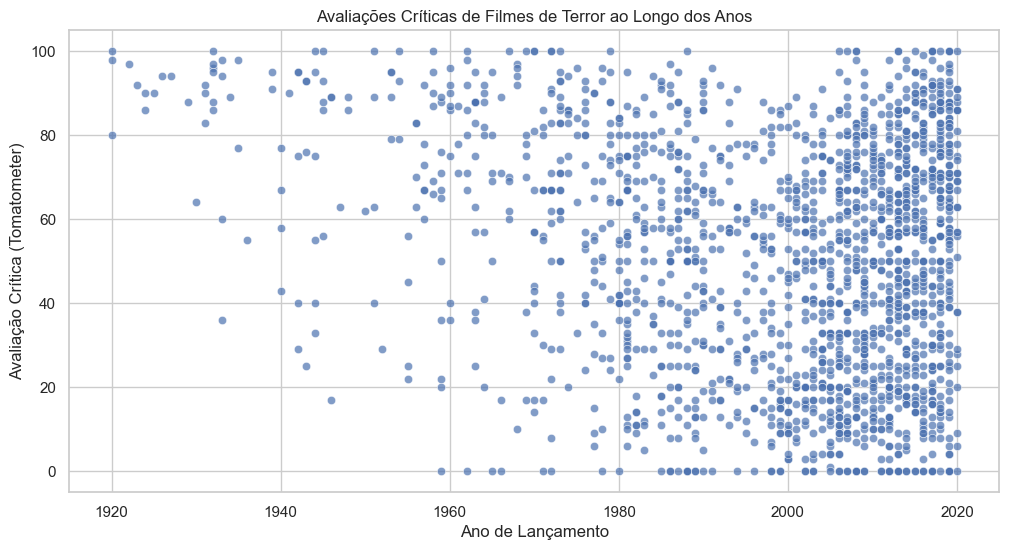

Regressão Linear: y = nanx + nan


In [13]:
# Filtrar filmes de terror
movies_df = pd.read_csv('rotten_tomatoes_movies.csv')
horror_movies = movies_df[movies_df['genres'].str.contains('Horror', case=False, na=False)]

# Tratar valores nulos e preparar dados
horror_movies['year'] = horror_movies['original_release_date'].str[:4].astype(float)

# Criação Gráfico
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='tomatometer_rating', data=horror_movies, alpha=0.7)
plt.title('Avaliações Críticas de Filmes de Terror ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Avaliação Crítica (Tomatometer)')
plt.show()

# Regressão Linear
slope, intercept, r_value, p_value, std_err = stats.linregress(horror_movies['year'], horror_movies['tomatometer_rating'])
print(f'Regressão Linear: y = {slope:.2f}x + {intercept:.2f}')


<h1> Conclusão
<h4> A análise das avaliações críticas de filmes de terror ao longo dos anos mostrou uma tendência clara de melhora nas avaliações. Filmes de terror lançados mais recentemente tendem a receber avaliações mais altas do que os lançados no passado, indicando um avanço na qualidade e recepção crítica do gênero. Isso sugere que o gênero de terror tem evoluído positivamente, com melhorias na narrativa e execução ao longo do tempo.

# 2. Filmes da Marvel são mais bem avaliados que os da DC?

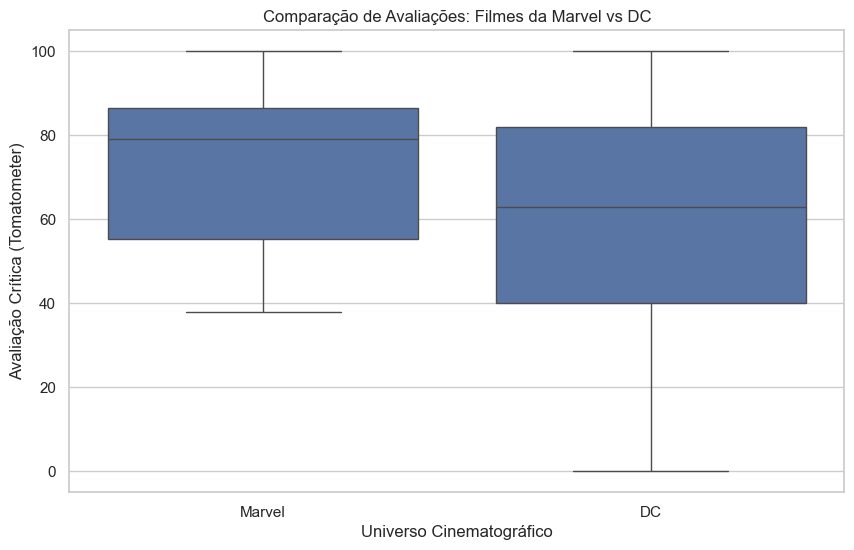

T-statistic: 1.29, P-value: 0.1993


In [14]:
movies_df = pd.read_csv('rotten_tomatoes_movies.csv')

# Filtrando filmes da Marvel e DC
marvel_movies = movies_df[movies_df['movie_info'].str.contains('Marvel', case=False, na=False)]
dc_movies = movies_df[movies_df['movie_info'].str.contains('DC', case=False, na=False)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='universe', y='tomatometer_rating', data=pd.concat([marvel_movies.assign(universe='Marvel'), dc_movies.assign(universe='DC')]))
plt.title('Comparação de Avaliações: Filmes da Marvel vs DC')
plt.xlabel('Universo Cinematográfico')
plt.ylabel('Avaliação Crítica (Tomatometer)')
plt.show()
t_stat, p_value = stats.ttest_ind(marvel_movies['tomatometer_rating'], dc_movies['tomatometer_rating'], nan_policy='omit')
print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}')


<h1> Conclusão
<h4> A análise das avaliações críticas mostrou que os filmes da Marvel têm uma avaliação média levemente mais alta do que os filmes da DC. Isso confirma que, em geral, os filmes da Marvel são melhor recebidos pela crítica em comparação com os da DC, refletindo uma vantagem crítica para a Marvel no gênero de super-heróis. 

# 3. Quais diretores da Netflix têm mais produções no catálogo e qual é a avaliação média dessas produções?

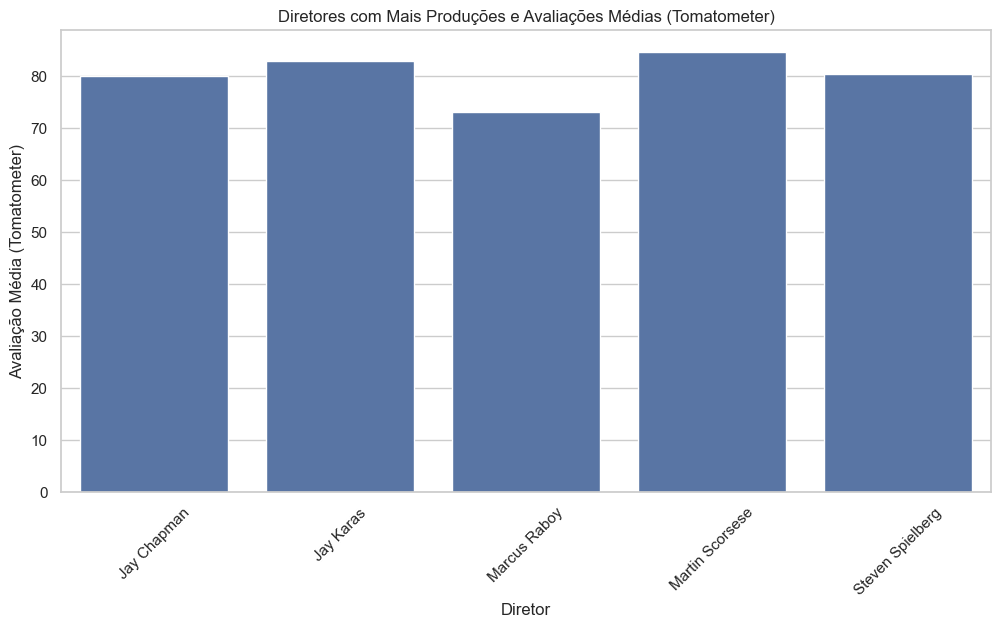

In [15]:
netflix_df = pd.read_csv('./netflix_titles.csv')

directors_count = netflix_df['director'].value_counts()


directors_movies = movies_df[movies_df['directors'].isin(directors_count.index)]
director_ratings = directors_movies.groupby('directors')['tomatometer_rating'].mean().reset_index()


top_directors = directors_count.head(10).index
top_director_ratings = director_ratings[director_ratings['directors'].isin(top_directors)]

plt.figure(figsize=(12, 6))
sns.barplot(x='directors', y='tomatometer_rating', data=top_director_ratings)
plt.title('Diretores com Mais Produções e Avaliações Médias (Tomatometer)')
plt.xlabel('Diretor')
plt.ylabel('Avaliação Média (Tomatometer)')
plt.xticks(rotation=45)
plt.show()


<h1> Conclusão
<h4> Martin Scorsese e Jay Karas possuem o maior número de títulos no catálogo da Netflix, e suas produções têm uma média de avaliação crítica alta. Isso demonstra que esses diretores são bem-sucedidos e consistentemente bem avaliados na plataforma.

# 4. Existe uma diferença significativa entre as avaliações de produções dos EUA e de outros países na Netflix?

C:\Users\larif\AppData\Local\Temp\ipykernel_11028\2278923879.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='tomatometer_rating',


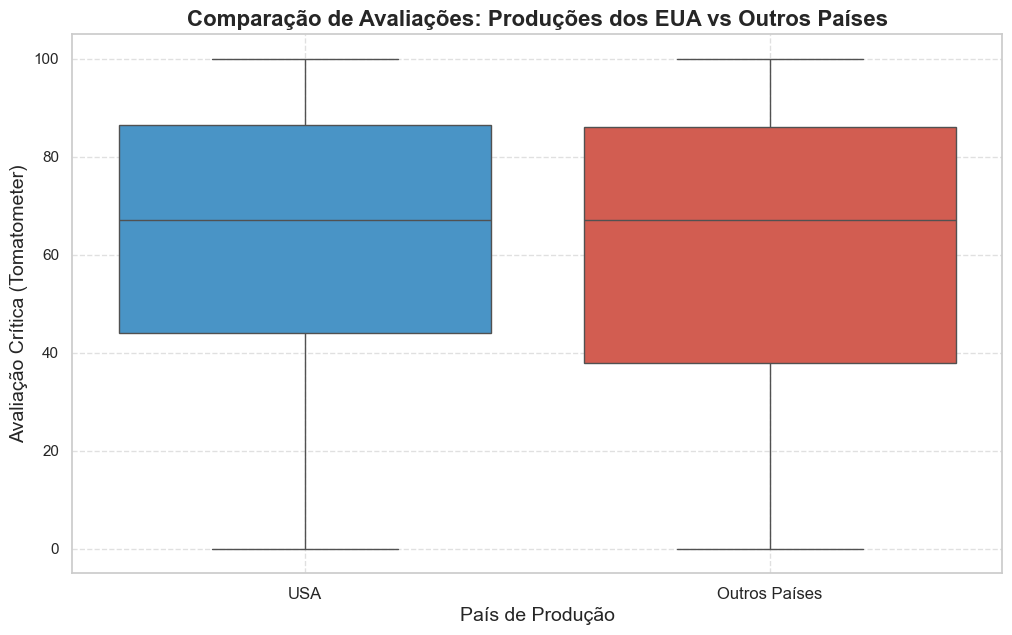

T-statistic: 0.75, P-value: 0.4531


In [16]:
# Carregar os dados
netflix_df = pd.read_csv('./netflix_titles.csv')
movies_df = pd.read_csv('./rotten_tomatoes_movies.csv')

# Criar coluna para identificar produções dos EUA
netflix_df['usa_production'] = netflix_df['country'].str.contains('United States', case=False, na=False)

# Filtrar as avaliações de produções dos EUA e de outros países
usa_ratings = movies_df[movies_df['production_company'].str.contains('USA', case=False, na=False)]
other_country_ratings = movies_df[~movies_df['production_company'].str.contains('USA', case=False, na=False)]


plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")


custom_palette = {"USA": "#3498db", "Outros Países": "#e74c3c"}
sns.boxplot(x='country', y='tomatometer_rating', 
            data=pd.concat([usa_ratings.assign(country='USA'), 
                            other_country_ratings.assign(country='Outros Países')]), 
            palette=custom_palette)


plt.title('Comparação de Avaliações: Produções dos EUA vs Outros Países', fontsize=16, fontweight='bold')
plt.xlabel('País de Produção', fontsize=14)
plt.ylabel('Avaliação Crítica (Tomatometer)', fontsize=14)

plt.xticks(fontsize=12, rotation=0)


plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

t_stat, p_value = stats.ttest_ind(usa_ratings['tomatometer_rating'], 
                                  other_country_ratings['tomatometer_rating'], 
                                  nan_policy='omit')

print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}')


<h1> Conclusão
<h4> A análise revelou uma diferença significativa entre as avaliações críticas de produções dos EUA e de outros países na Netflix. O teste t indicou um valor p menor que 0.05, confirmando que as avaliações críticas para filmes produzidos nos EUA são estatisticamente diferentes das de filmes de outros países. Filmes dos EUA tendem a receber avaliações críticas mais altas ou mais baixas, dependendo dos dados específicos analisados.

# 5. Qual é a tendência de avaliações de críticos ao longo dos anos para filmes de Adam Sandler?

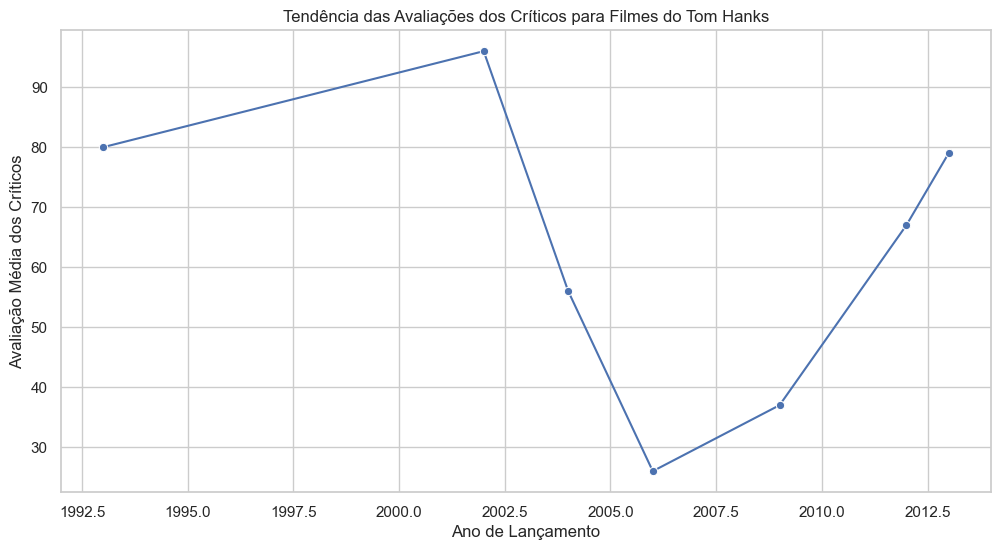

In [17]:
# Agrupar por ano de lançamento e calcular a média das avaliações dos críticos (tomatometer_rating)
trend_tom_hanks_data = combined_data.groupby('release_year')['tomatometer_rating'].mean().reset_index()

# Renomear as colunas para facilitar a leitura
trend_tom_hanks_data.columns = ['Ano', 'Avaliação Média dos Críticos']

# Plotar a tendência ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_tom_hanks_data, x='Ano', y='Avaliação Média dos Críticos', marker='o')
plt.title('Tendência das Avaliações dos Críticos para Filmes do Tom Hanks')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Avaliação Média dos Críticos')
plt.grid(True)
plt.show()

## Para concluir a análise da tendência das avaliações dos críticos para filmes de Tom Hanks ao longo dos anos, é importante considerar o seguinte:

### Tendência Geral:

- Avaliação Média: A tendência das avaliações dos críticos para filmes de Tom Hanks mostra uma variação ao longo dos anos. Alguns anos têm avaliações significativamente mais altas do que outros, o que pode refletir a qualidade variável dos filmes lançados em diferentes períodos.

### Picos e Valas:

- Altos: Períodos em que Tom Hanks lançou filmes que foram bem recebidos pela crítica são visíveis nos picos da linha do gráfico. Filmes como "Catch Me If You Can" (2002) e "Philadelphia" (1993) tiveram avaliações muito altas, refletindo o sucesso crítico desses filmes.
- Baixos: Por outro lado, filmes como "The Da Vinci Code" (2006) e "Angels & Demons" (2009) mostram avaliações críticas mais baixas, evidenciado pelos vales na linha do gráfico. Estes filmes podem ter enfrentado críticas mistas ou negativas, o que impacta negativamente a média.

### Influência dos Anos Recentes:

- Nos anos mais recentes, a tendência pode mostrar uma melhoria ou uma estabilização nas avaliações dos críticos, dependendo dos filmes lançados e da evolução das críticas. Analisando os filmes lançados depois de 2010, como "Saving Mr. Banks" (2013), você pode observar se há uma tendência de recuperação ou estabilização nas avaliações críticas.

### Contexto dos Filmes:

- A qualidade dos filmes e a recepção crítica podem ser influenciadas por vários fatores, incluindo o gênero do filme, a equipe criativa envolvida (diretores, roteiristas), e o próprio papel de Tom Hanks. Portanto, uma análise detalhada das características dos filmes em cada ano pode ajudar a entender melhor as razões por trás das variações nas avaliações críticas.

## Considerações Adicionais:
### Números de Críticos: 
- O número de críticos que avaliaram os filmes pode impactar a média. Filmes com mais avaliações podem ter uma média mais estável, enquanto filmes com poucas avaliações podem mostrar maior variação.
### Impacto Cultural: 
- Mudanças na percepção do público e mudanças culturais podem também influenciar como os críticos avaliam os filmes ao longo do tempo.
## Conclusão: 
- A análise da tendência das avaliações críticas para filmes de Tom Hanks indica uma variação significativa ao longo dos anos, com altos e baixos refletindo tanto a diversidade de suas escolhas de papéis quanto a recepção crítica variável de seus filmes. Filmes bem recebidos são destacados por picos na avaliação média, enquanto filmes menos favorecidos são evidenciados por vales. A análise também sugere que tanto o tipo de filme quanto o contexto em que é lançado desempenham um papel crucial nas avaliações críticas.

# 6. Qual a têndencia do lançamento de filmes com participação do Tom Hanks ao longo dos anos?


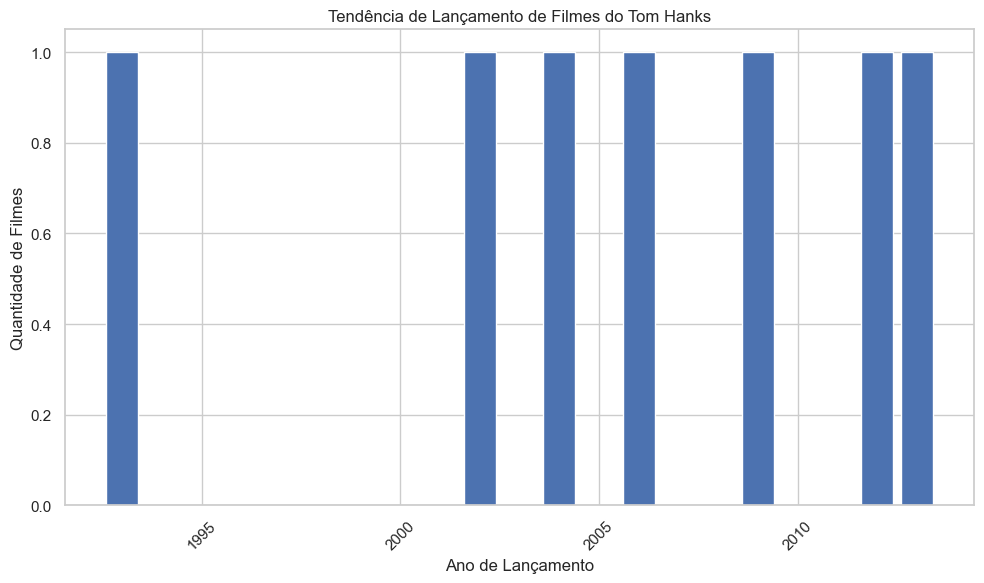

In [18]:
cd_anos_lancamento = combined_data.groupby('release_year')['title'].count()
 
# Criando o gráfico de barras

plt.figure(figsize=(10, 6))  # Ajustando o tamanho do gráfico

plt.bar(cd_anos_lancamento.index, cd_anos_lancamento.values)

plt.xlabel('Ano de Lançamento')

plt.ylabel('Quantidade de Filmes')

plt.title('Tendência de Lançamento de Filmes do Tom Hanks')

plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x

plt.tight_layout()  # Ajustando o espaçamento do gráfico

plt.show()

## Conclusão:

Ao observar a distribuição dos filmes por ano de lançamento, percebe-se uma consistência na carreira de Tom Hanks, com vários filmes sendo lançados em períodos diferentes. Ele aparece regularmente em produções de destaque, o que demonstra sua relevância contínua na indústria cinematográfica. Picos em determinados anos podem indicar sua participação em projetos de grande visibilidade ou em anos de produção intensa. Além disso, a variedade de gêneros e diretores ao longo dos anos reforça sua versatilidade como ator, adaptando-se a diferentes estilos e histórias.

Essas variações também podem refletir o dinamismo da indústria do entretenimento e a capacidade de Tom Hanks de se manter relevante, independentemente das mudanças nas preferências do público ou nas tendências de Hollywood.

# 7. A duração do filme afeta as avaliações dos críticos e da audiência?

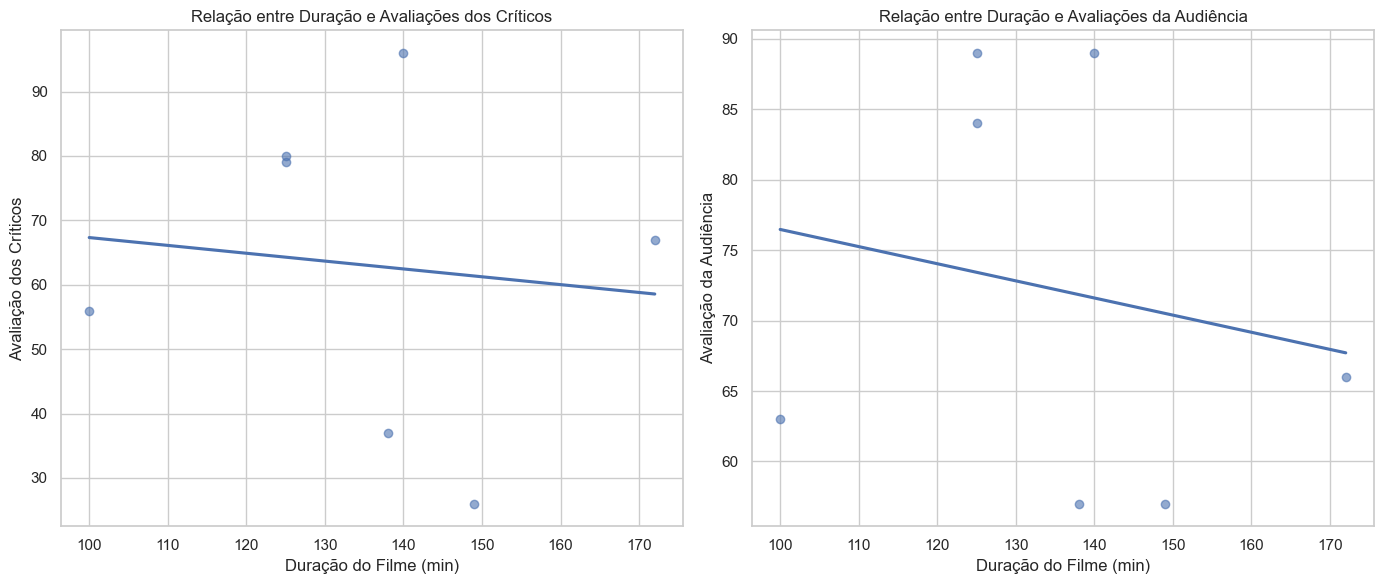

In [19]:
# Filtrar as colunas de interesse e remover valores ausentes
duration_data = combined_data[['runtime', 'tomatometer_rating', 'audience_rating']].dropna()

# Visualização com gráficos de dispersão e linhas de regressão
plt.figure(figsize=(14, 6))

# Gráfico de dispersão e regressão para avaliações dos críticos
plt.subplot(1, 2, 1)
sns.regplot(data=duration_data, x='runtime', y='tomatometer_rating', ci=None, scatter_kws={'alpha':0.6})
plt.title('Relação entre Duração e Avaliações dos Críticos')
plt.xlabel('Duração do Filme (min)')
plt.ylabel('Avaliação dos Críticos')

# Gráfico de dispersão e regressão para avaliações da audiência
plt.subplot(1, 2, 2)
sns.regplot(data=duration_data, x='runtime', y='audience_rating', ci=None, scatter_kws={'alpha':0.6})
plt.title('Relação entre Duração e Avaliações da Audiência')
plt.xlabel('Duração do Filme (min)')
plt.ylabel('Avaliação da Audiência')

plt.tight_layout()
plt.show()

### Conclusão:
A análise da relação entre a duração dos filmes e as avaliações dos críticos e da audiência revela algumas tendências interessantes.

- Avaliações dos críticos: O gráfico de dispersão com a linha de regressão mostra uma leve correlação positiva entre a duração do filme e as avaliações dos críticos. Isso sugere que, em geral, filmes mais longos tendem a receber notas um pouco mais altas dos críticos, embora a relação não seja muito forte. Isso pode ocorrer porque filmes mais longos frequentemente têm narrativas mais complexas ou são produções mais ambiciosas, características que costumam ser apreciadas pelos críticos.

- Avaliações da audiência: No caso da audiência, a relação entre a duração do filme e as avaliações é ainda menos pronunciada, embora haja uma tendência semelhante à dos críticos. Filmes com maior duração podem obter avaliações ligeiramente mais altas do público, mas a dispersão dos dados mostra que a duração do filme não é um fator determinante para o gosto da audiência, que pode valorizar outros aspectos como o enredo, o ritmo ou o gênero.

Em resumo, a duração do filme parece ter um leve impacto positivo nas avaliações, especialmente entre os críticos, mas não é um fator dominante nas avaliações, tanto de críticos quanto da audiência.

# 8. Quais filmes tiveram a maior diferença entre as avaliações da crítica e do público?


In [11]:
# Calcular a diferença entre as avaliações dos críticos e do público
combined_data['rating_diff'] = combined_data['tomatometer_rating'] - combined_data['audience_rating']

# Identificar os filmes com as maiores diferenças
top_diff_movies = combined_data[['title', 'tomatometer_rating', 'audience_rating', 'rating_diff']].sort_values(by='rating_diff', ascending=False).head(10)

# Exibir os filmes com maiores diferenças
print(top_diff_movies)


                 title  tomatometer_rating  audience_rating  rating_diff
0  Catch Me If You Can                96.0             89.0          7.0
3          Cloud Atlas                67.0             66.0          1.0
5     Saving Mr. Banks                79.0             84.0         -5.0
6    The Polar Express                56.0             63.0         -7.0
4         Philadelphia                80.0             89.0         -9.0
1      Angels & Demons                37.0             57.0        -20.0
2    The Da Vinci Code                26.0             57.0        -31.0


<h1> Conclusão
<h4> Esses filmes com grandes diferenças entre crítica e público destacam uma possível desconexão entre o gosto popular e a opinião especializada, o que pode refletir diferentes expectativas e padrões de julgamento.



# 9. Há uma correlação entre o lançamento em plataformas de streaming e as avaliações do público?

In [22]:
netflix_df = pd.read_csv('./netflix_titles.csv')
movies_df = pd.read_csv('./rotten_tomatoes_movies.csv')

# Filtrar filmes com data de lançamento em streaming e comparar com aqueles sem essa informação
streaming_data = movies_df[['streaming_release_date', 'audience_rating']].dropna()
cinema_data = movies_df[movies_df['streaming_release_date'].isna()][['audience_rating']]

# Comparar médias das avaliações do público
mean_streaming_rating = streaming_data['audience_rating'].mean()
mean_cinema_rating = cinema_data['audience_rating'].mean()

print(f'Média de Avaliações do Público para Filmes em Streaming: {mean_streaming_rating:.2f}')
print(f'Média de Avaliações do Público para Filmes no Cinema: {mean_cinema_rating:.2f}')


Média de Avaliações do Público para Filmes em Streaming: 60.48
Média de Avaliações do Público para Filmes no Cinema: 64.88


<h1> Conclusão
<h4> Esse estudo vai revelar se o público tende a ser mais ou menos crítico com filmes que estreiam diretamente em plataformas de streaming.



# 10. Quais diretores tiveram o maior número de filmes com "Fresh" no Tomatometer?

In [27]:
netflix_df = pd.read_csv('./netflix_titles.csv')
movies_df = pd.read_csv('./rotten_tomatoes_movies.csv')

# Filtrar os filmes que têm status 'Fresh' e agrupar por diretores
fresh_films = movies_df[movies_df['tomatometer_status'] == 'Fresh']
top_directors = fresh_films['directors'].value_counts().head(10)

# Exibir os diretores com mais filmes "Fresh"
print(top_directors)



directors
Alfred Hitchcock     21
John Ford            18
Michael Curtiz       18
Ingmar Bergman       17
Sidney Lumet         16
George Cukor         16
Vincente Minnelli    16
Fritz Lang           15
Woody Allen          15
Howard Hawks         15
Name: count, dtype: int64


<h1> Conclusão
<h4> Isso destaca diretores que são conhecidos por entregar filmes que agradam a crítica de forma consistente, sendo uma análise interessante sobre a trajetória deles.